In [1]:
# for DataFrames and manipulations
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

import xgboost as xgb

# removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

seed = 7

In [2]:
df = pd.read_csv('df_with_missing_values_dropped.csv')

In [3]:
df.head(5)

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U,D_64_nan
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,NaN,0.005109,0.080204,0.740062,0.132626,0.001436,0.425848,0.538275,0.237232,0.150155,0.060502,0.003083,0.149338,0.670537,0.001064,0.009852,0.207560,0.647352,0.325464,NaN,0.050146,0.007260,0.006510,1.001046,0.004440,0.077352,0.111060,0.755829,0.196520,0.166448,0.092181,0.002498,0.005720,0.013617,0.029953,0.068978,0.141639,0.228128,0.042265,0.561116,0.453934,0.009596,0.005605,NaN,1.005261,0.007416,0.009710,6.0,0.187413,0.004807,0.846702,0.003347,0.007434,0.006082,0.008649,0.312937,0.000911,0.200894,0.044315,0.003468,0.006486,0.009681,0.008714,0.003488,0.417256,0.009573,0.000013,0.008737,0.003418,0.008551,0.005027,0.207844,0.004827,0.008204,0.002737,0.001271,0.507222,0.007090,1.001785,0.098844,0.009521,0.003492,0.004815,0.009732,0.004530,0.008460,0.0,0.007482,0.003417,0.004134,0.007100,1,0.000869,0.002693,0.008749,0.004063,0.005139,0.007752,1.004296,0.000888,0.000684,0.000934,1.007865,0.004344,0.004264,0.007412,0.004308,0.006280,0.005712,0.933347,0.136322,0.950119,0.979136,0.003096,0.922532,1.003984,1.015417,1.067105,0.670781,0.009383,0.018704,1.003859,2.0,0.003869,1.002848,0.100918,0.979416,0.005959,1.0,0.256733,0.0,4.0,0.253851,0.247433,0.0,0.719052,0.434562,0.001219,0.689587,0.009668,1.0,1.007528,0.999822,1.004776,0.006563,0.009851,0.004304,0.000122,0.007725,0.001563,0.001976,0.002569,0.001098,0.006346,0.004204,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-03-01,0.929122,0.382790,0.025782,1.002647,0.005515,0.089799,0.001479,0.005830,NaN,0.009873,0.021776,0.239459,0.070967,0.008058,0.457826,0.382562,0.059342,0.201574,0.032390,0.007684,NaN,0.334386,0.007561,0.005552,0.110471,0.619012,0.302757,NaN,0.025802,0.011677,0.003243,1.009099,0.001485,0.072583,0.026337,0.596242,0.052813,0.684371,0.036490,0.004105,0.007069,NaN,0.015918,0.230700,0.375191,0.063612,0.005119,0.281806,0.239244,0.007912,0.174382,NaN,1.008107,0.001015,0.002688,6.0,0.175123,0.000396,0.282619,0.006760,0.006521,0.007803,0.001396,0.015735,0.002945,0.200131,0.014834,0.004637,0.000560,0.000939,0.000798,0.000963,0.222324,0.027022,0.005833,0.002569,0.000223,0.009420,0.001228,0.008212,0.000954,0.008326,0.002704,0.002767,NaN,0.000797,1.002751,0.020552,0.007203,0.002874,0.001399,0.003912,0.004593,0.004460,0.0,0.003757,0.002582,0.007083,0.004040,1,0.002157,0.009864,0.005578,0.008184,NaN,0.003199,1.006756,0.009185,0.000482,0.004166,0.007530,0.000142,0.005410,0.008460,0.001500,0.004736,0.001770,0.914921,0.135440,0.926104,0.976465,0.006042,0.001040,0.007944,0.007099,NaN,0.007600,0.005126,0.023904,1.003868,2.0,0.009713,1.008423,0.030687,NaN,0.005897,1.0,0.430118,0.0,-1.0,0.418370,0.416349,0.0,0.527146,0.292568,0.009932,0.137895,0.009582,1.0,0.008318,1.002662,0.003712,0.002124,0.002148,0.003912,0.001289,0.003198,0.003776,0.001808,0.008200,0.001061,0.000027,0.002629,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,

In [4]:
df1 = df.drop('Unnamed: 0', axis=1)

In [5]:
df1.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U,D_64_nan
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,NaN,0.005109,0.080204,0.740062,0.132626,0.001436,0.425848,0.538275,0.237232,0.150155,0.060502,0.003083,0.149338,0.670537,0.001064,0.009852,0.207560,0.647352,0.325464,NaN,0.050146,0.007260,0.006510,1.001046,0.004440,0.077352,0.111060,0.755829,0.196520,0.166448,0.092181,0.002498,0.005720,0.013617,0.029953,0.068978,0.141639,0.228128,0.042265,0.561116,0.453934,0.009596,0.005605,NaN,1.005261,0.007416,0.009710,6.0,0.187413,0.004807,0.846702,0.003347,0.007434,0.006082,0.008649,0.312937,0.000911,0.200894,0.044315,0.003468,0.006486,0.009681,0.008714,0.003488,0.417256,0.009573,0.000013,0.008737,0.003418,0.008551,0.005027,0.207844,0.004827,0.008204,0.002737,0.001271,0.507222,0.007090,1.001785,0.098844,0.009521,0.003492,0.004815,0.009732,0.004530,0.008460,0.0,0.007482,0.003417,0.004134,0.007100,1,0.000869,0.002693,0.008749,0.004063,0.005139,0.007752,1.004296,0.000888,0.000684,0.000934,1.007865,0.004344,0.004264,0.007412,0.004308,0.006280,0.005712,0.933347,0.136322,0.950119,0.979136,0.003096,0.922532,1.003984,1.015417,1.067105,0.670781,0.009383,0.018704,1.003859,2.0,0.003869,1.002848,0.100918,0.979416,0.005959,1.0,0.256733,0.0,4.0,0.253851,0.247433,0.0,0.719052,0.434562,0.001219,0.689587,0.009668,1.0,1.007528,0.999822,1.004776,0.006563,0.009851,0.004304,0.000122,0.007725,0.001563,0.001976,0.002569,0.001098,0.006346,0.004204,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-03-01,0.929122,0.382790,0.025782,1.002647,0.005515,0.089799,0.001479,0.005830,NaN,0.009873,0.021776,0.239459,0.070967,0.008058,0.457826,0.382562,0.059342,0.201574,0.032390,0.007684,NaN,0.334386,0.007561,0.005552,0.110471,0.619012,0.302757,NaN,0.025802,0.011677,0.003243,1.009099,0.001485,0.072583,0.026337,0.596242,0.052813,0.684371,0.036490,0.004105,0.007069,NaN,0.015918,0.230700,0.375191,0.063612,0.005119,0.281806,0.239244,0.007912,0.174382,NaN,1.008107,0.001015,0.002688,6.0,0.175123,0.000396,0.282619,0.006760,0.006521,0.007803,0.001396,0.015735,0.002945,0.200131,0.014834,0.004637,0.000560,0.000939,0.000798,0.000963,0.222324,0.027022,0.005833,0.002569,0.000223,0.009420,0.001228,0.008212,0.000954,0.008326,0.002704,0.002767,NaN,0.000797,1.002751,0.020552,0.007203,0.002874,0.001399,0.003912,0.004593,0.004460,0.0,0.003757,0.002582,0.007083,0.004040,1,0.002157,0.009864,0.005578,0.008184,NaN,0.003199,1.006756,0.009185,0.000482,0.004166,0.007530,0.000142,0.005410,0.008460,0.001500,0.004736,0.001770,0.914921,0.135440,0.926104,0.976465,0.006042,0.001040,0.007944,0.007099,NaN,0.007600,0.005126,0.023904,1.003868,2.0,0.009713,1.008423,0.030687,NaN,0.005897,1.0,0.430118,0.0,-1.0,0.418370,0.416349,0.0,0.527146,0.292568,0.009932,0.137895,0.009582,1.0,0.008318,1.002662,0.003712,0.002124,0.002148,0.003912,0.001289,0.003198,0.003776,0.001808,0.008200,0.001061,0.000027,0.002629,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2017-09-11,0.9044

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Columns: 177 entries, customer_ID to D_64_nan
dtypes: float64(173), int64(2), object(2)
memory usage: 619.7+ MB


# Train-Test Split #

In [7]:
# define the train, test1, and test2 date ranges
# we split the sample set this way in order for our model to learn the effects of different seasons / time periods
train_start_date = '2017-05-01'
train_end_date = '2018-01-31'
test1_start_date = '2017-03-01'
test1_end_date = '2017-04-30'
test2_start_date = '2018-02-01'
test2_end_date = '2018-03-31'

# split the data into train, test1, and test2 samples based on the date ranges
train = df1[(df1['S_2'] >= train_start_date) & (df1['S_2'] <= train_end_date)]
test1 = df1[(df1['S_2'] >= test1_start_date) & (df1['S_2'] <= test1_end_date)]
test2 = df1[(df1['S_2'] >= test2_start_date) & (df1['S_2'] <= test2_end_date)]
xtrain = train.drop(['target', 'customer_ID', 'S_2'], axis=1)
ytrain = train['target']

In [8]:
# calculate default rate for each time period
# we see that train and test samples are not fundamentally different
print('Default rate for time period 2017-05-01 to 2018-01-31: ', sum(train["target"])/len(train["target"]))
print('Default rate for time period 2017-03-01 to 2017-04-30: ', sum(test1["target"])/len(test1["target"]))
print('Default rate for time period 2018-02-01 to 2018-03-31: ', sum(test2["target"])/len(test2["target"]))

Default rate for time period 2017-05-01 to 2018-01-31:  0.2579734203111879
Default rate for time period 2017-03-01 to 2017-04-30:  0.23518307567127747
Default rate for time period 2018-02-01 to 2018-03-31:  0.27865261928295443


In [9]:
# run xgboost using default parameters 

import xgboost as xgb

xgb_instance = xgb.XGBClassifier(random_state = seed) # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.
model_for_feature_selection = xgb_instance.fit(xtrain, ytrain)

feature_importance = {'Feature':xtrain.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
0,P_2,0.293172
2,B_1,0.058602
22,B_9,0.029621
11,D_45,0.024651
4,R_1,0.017049
9,D_44,0.016296
16,D_48,0.016065
7,B_3,0.015911
5,S_3,0.015093
130,B_38,0.014598


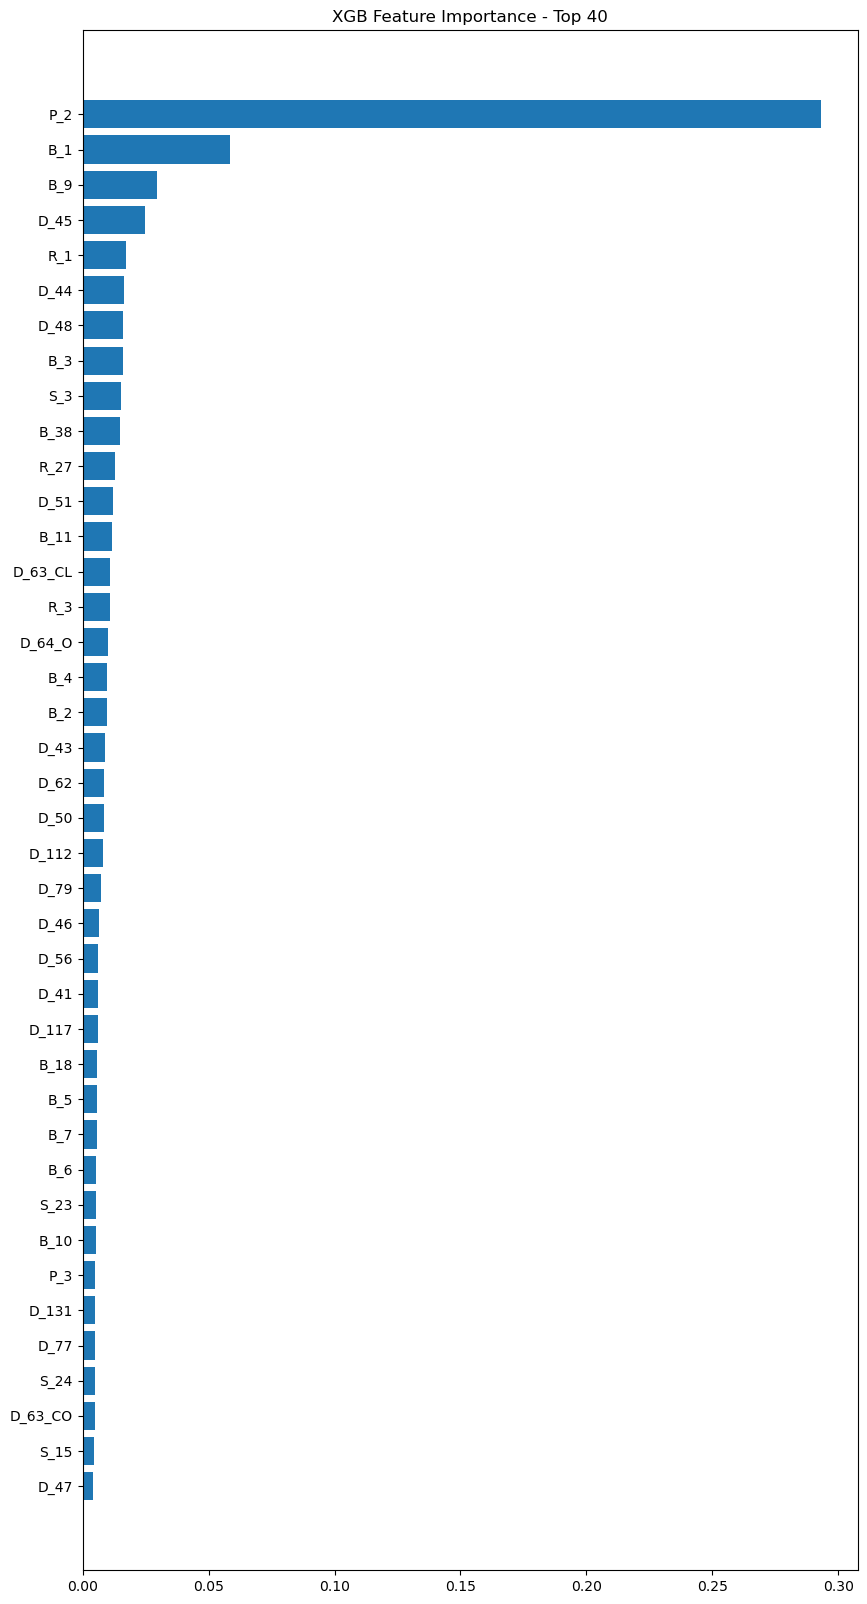

In [10]:
# for data Visualization
import matplotlib.pyplot as plt

num_features = 40
plt.figure(figsize=(10,5*num_features//10))
plt.barh(np.arange(num_features,0,-1), feature_importance['Importance'].values[:num_features])
plt.yticks(np.arange(num_features,0,-1), feature_importance['Feature'].values[:num_features])
plt.title(f'XGB Feature Importance - Top {num_features}')
plt.show()

In [11]:
# choose features with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]
final_features

0          P_2
2          B_1
22         B_9
11        D_45
4          R_1
9         D_44
16        D_48
7          B_3
5          S_3
130       B_38
129       R_27
21        D_51
29        B_11
163    D_63_CL
23         R_3
170     D_64_O
10         B_4
3          B_2
8         D_43
48        D_62
20        D_50
132      D_112
76        D_79
14        D_46
37        D_56
6         D_41
139      D_117
52        B_18
12         B_5
18         B_7
17         B_6
118       S_23
26        B_10
25         P_3
Name: Feature, dtype: object

In [12]:
# run xgboost with parameters
# define xgboost hyperparameters
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "learning_rate": 0.5,
    "max_depth": 4,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "scale_pos_weight": 5
}


# train xgboost model
xgb_instance = xgb.XGBClassifier(**params, random_state = seed)
model_for_feature_impotance_with_params = xgb_instance.fit(xtrain, ytrain)

In [13]:
feature_importance_with_params = {'Feature':xtrain.columns,'Importance':model_for_feature_impotance_with_params.feature_importances_}
feature_importance_with_params = pd.DataFrame(feature_importance_with_params)
feature_importance_with_params.sort_values("Importance", inplace=True,ascending=False)
feature_importance_with_params

,Feature,Importance
0,P_2,0.163152
2,B_1,0.058628
16,D_48,0.026886
69,D_75,0.023237
163,D_63_CL,0.020322
170,D_64_O,0.020154
18,B_7,0.020077
11,D_45,0.017606
48,D_62,0.016386
19,B_8,0.015707


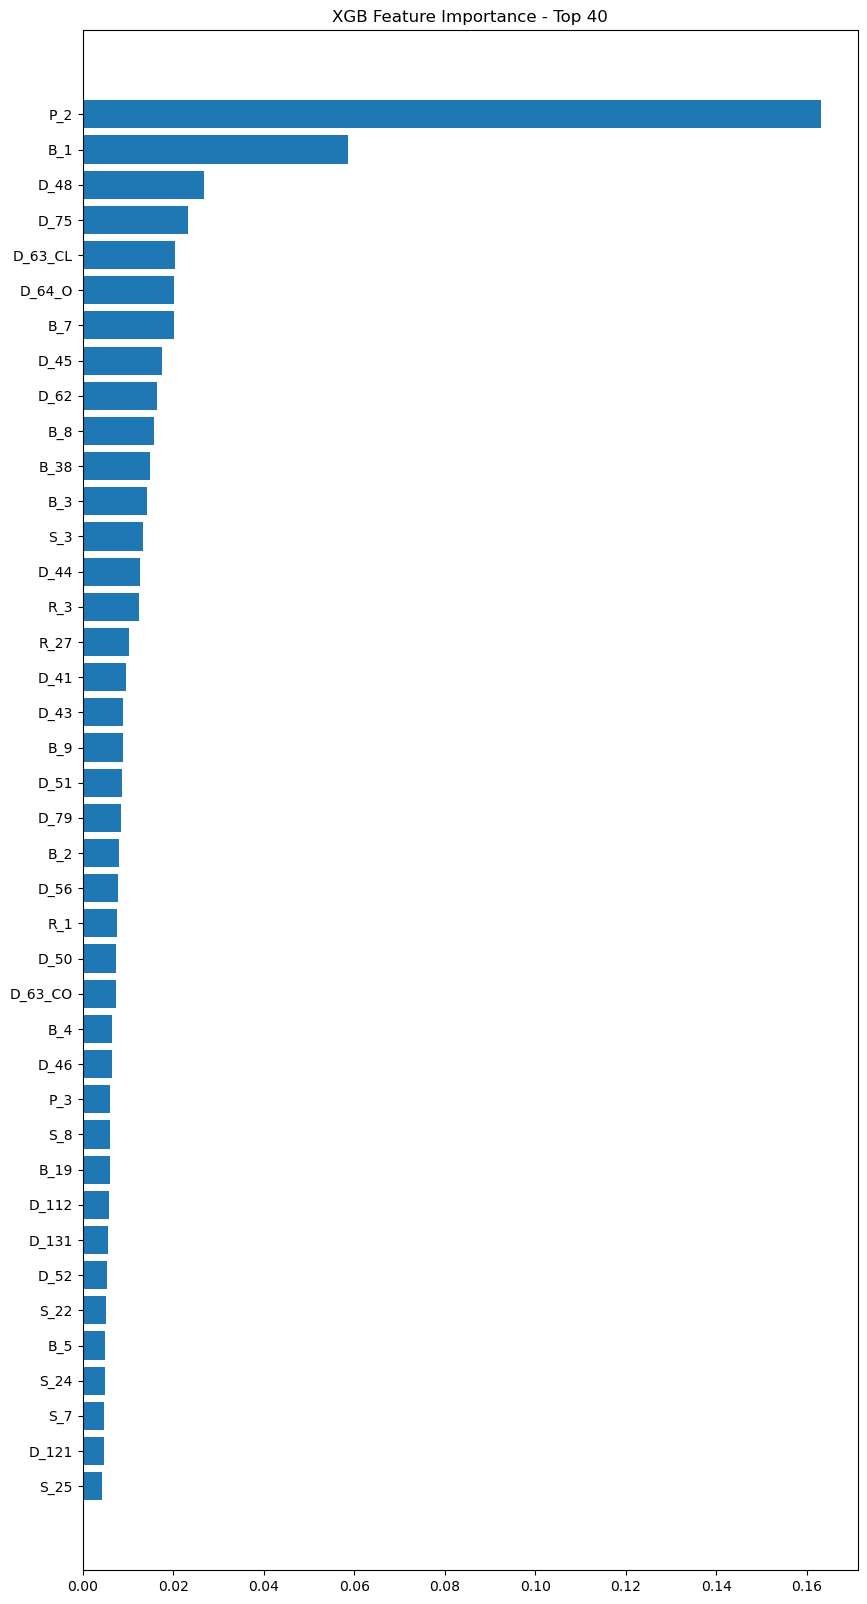

In [14]:
# for data Visualization
import matplotlib.pyplot as plt

num_features = 40
plt.figure(figsize=(10,5*num_features//10))
plt.barh(np.arange(num_features,0,-1), feature_importance_with_params['Importance'].values[:num_features])
plt.yticks(np.arange(num_features,0,-1), feature_importance_with_params['Feature'].values[:num_features])
plt.title(f'XGB Feature Importance - Top {num_features}')
plt.show()

In [15]:
final_features_with_params = feature_importance_with_params["Feature"][feature_importance_with_params.Importance > 0.005]

In [16]:
final_features_with_params

0          P_2
2          B_1
16        D_48
69        D_75
163    D_63_CL
170     D_64_O
18         B_7
11        D_45
48        D_62
19         B_8
130       B_38
7          B_3
5          S_3
9         D_44
23         R_3
129       R_27
6         D_41
8         D_43
22         B_9
21        D_51
76        D_79
3          B_2
37        D_56
4          R_1
20        D_50
164    D_63_CO
10         B_4
14        D_46
25         P_3
35         S_8
53        B_19
132      D_112
154      D_131
24        D_52
117       S_22
Name: Feature, dtype: object

In [17]:
merged_features = pd.merge(final_features, final_features_with_params)

In [18]:
merged_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Feature  27 non-null     object
dtypes: object(1)
memory usage: 432.0+ bytes


In [19]:
merged_features = merged_features['Feature'].tolist()

In [20]:
merged_features

['P_2',
 'B_1',
 'B_9',
 'D_45',
 'R_1',
 'D_44',
 'D_48',
 'B_3',
 'S_3',
 'B_38',
 'R_27',
 'D_51',
 'D_63_CL',
 'R_3',
 'D_64_O',
 'B_4',
 'B_2',
 'D_43',
 'D_62',
 'D_50',
 'D_112',
 'D_79',
 'D_46',
 'D_56',
 'D_41',
 'B_7',
 'P_3']

In [21]:
X_train = xtrain[merged_features]

In [22]:
Y_train = ytrain

In [23]:
# features selected for test1 and test2
xtest1 = test1[merged_features]
xtest2 = test2[merged_features]

# Normalization #

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [25]:
X_train_normalized = sc.transform(X_train)
X_test1_normalized = sc.transform(xtest1)
X_test2_normalized = sc.transform(xtest2)

In [26]:
type(X_test2_normalized)

numpy.ndarray

In [27]:
# convert to Pandas DF
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=xtest1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=xtest2.columns)

In [28]:
type(X_test2_normalized)

pandas.core.frame.DataFrame

# Outlier treatment #

In [29]:
# looking at the following table, seems like there are some outliers
# one popular approach is to use 1 percentile as floor and 99 percentile as cap. 
# however, it is not a written rule and depends on modeler's decision
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,304837.0,-6.229839e-16,1.000002,-4.353256,-2.611577,0.134552,1.459009,1.476754
B_1,308431.0,1.516479e-16,1.000002,-9.266342,-0.585182,-0.433134,4.179080,5.682981
B_9,308431.0,5.740975e-18,1.000002,-0.665863,-0.665036,-0.566823,2.816933,52.512180
D_45,308179.0,-7.215861e-17,1.000002,-1.002609,-0.990234,-0.318900,3.118147,5.580388
R_1,308431.0,4.415699e-17,1.000002,-0.348937,-0.348414,-0.322758,4.189105,13.174340
D_44,292363.0,1.254103e-16,1.000002,-0.537534,-0.536847,-0.502273,4.072960,23.565394
D_48,267763.0,2.423233e-16,1.000002,-1.211756,-1.177791,-0.280988,1.901949,9.663061
B_3,308180.0,-8.702307e-17,1.000002,-0.553516,-0.552463,-0.511675,3.772076,6.277054
S_3,252291.0,1.937287e-16,1.000002,-3.637199,-1.136830,-0.331381,4.017150,20.954206
B_38,308180.0,-4.430438e-16,1.000002,-1.060005,-1.060005,-0.426984,2.738120,2.738120


In [30]:
X_train_normalized['P_3'] = np.where((X_train_normalized['P_3'] > 2.404090), 2.404090, X_train_normalized['P_3'])  
X_train_normalized['B_9'] = np.where((X_train_normalized['B_9'] > 2.816933), 2.816933, X_train_normalized['B_9'])  
X_train_normalized['D_44'] = np.where((X_train_normalized['D_44'] > 4.072960), 4.072960, X_train_normalized['D_44'])  
X_train_normalized['S_3'] = np.where((X_train_normalized['S_3'] > 4.017150), 4.017150, X_train_normalized['S_3']) 
X_train_normalized['R_1'] = np.where((X_train_normalized['R_1'] > 4.189105), 4.189105, X_train_normalized['R_1'])
X_train_normalized['R_3'] = np.where((X_train_normalized['R_3'] > 3.975631), 3.975631, X_train_normalized['R_3'])
X_train_normalized['D_48'] = np.where((X_train_normalized['D_48'] > 1.901949), 1.901949, X_train_normalized['D_48'])
X_train_normalized['D_51'] = np.where((X_train_normalized['D_51'] > 3.624639), 3.624639, X_train_normalized['D_51'])
X_train_normalized['D_50'] = np.where((X_train_normalized['D_50'] > 1.516028), 1.516028, X_train_normalized['D_50'])
X_train_normalized['D_43'] = np.where((X_train_normalized['D_43'] > 3.972277), 3.972277, X_train_normalized['D_43'])
X_train_normalized['D_46'] = np.where((X_train_normalized['D_46'] > 3.116399), 3.116399, X_train_normalized['D_46'])
X_train_normalized['D_41'] = np.where((X_train_normalized['D_41'] > 4.595613), 4.595613, X_train_normalized['D_41'])
X_train_normalized['D_62'] = np.where((X_train_normalized['D_62'] > 3.521453), 3.521453, X_train_normalized['D_62'])
X_train_normalized['D_79'] = np.where((X_train_normalized['D_79'] > 4.258512), 4.258512, X_train_normalized['D_79'])
X_train_normalized['D_56'] = np.where((X_train_normalized['D_56'] > 3.843661), 3.843661, X_train_normalized['D_56'])
X_train_normalized['B_4'] = np.where((X_train_normalized['B_4'] > 3.773781), 3.773781, X_train_normalized['B_4'])

X_train_normalized['B_1'] = np.where((X_train_normalized['B_1'] < -0.585182), -0.585182, X_train_normalized['B_1'])
X_train_normalized['B_7'] = np.where((X_train_normalized['B_7'] < -0.796128), -0.796128, X_train_normalized['B_7'])
X_train_normalized['D_50'] = np.where((X_train_normalized['D_50'] < -0.312234), -0.312234, X_train_normalized['D_50'])
X_train_normalized['P_3'] = np.where((X_train_normalized['P_3'] < -3.431286), -3.431286, X_train_normalized['P_3'])
X_train_normalized['D_46'] = np.where((X_train_normalized['D_46'] < 2.770751), 2.770751, X_train_normalized['D_46'])

X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,304837.0,-6.229839e-16,1.000002,-4.353256,-2.611577,0.134552,1.459009,1.476754
B_1,308431.0,3.009003e-04,0.999487,-0.585182,-0.585182,-0.433134,4.179080,5.682981
B_9,308431.0,-1.733387e-02,0.881151,-0.665863,-0.665036,-0.566823,2.816833,2.816933
D_45,308179.0,-7.215861e-17,1.000002,-1.002609,-0.990234,-0.318900,3.118147,5.580388
R_1,308431.0,-1.749606e-02,0.897798,-0.348937,-0.348414,-0.322758,4.189104,4.189105
D_44,292363.0,-1.255397e-02,0.928565,-0.537534,-0.536847,-0.502273,4.072946,4.072960
D_48,267763.0,-3.377872e-03,0.991251,-1.211756,-1.177791,-0.280988,1.901940,1.901949
B_3,308180.0,-8.702307e-17,1.000002,-0.553516,-0.552463,-0.511675,3.772076,6.277054
S_3,252291.0,-1.362732e-02,0.921988,-3.637199,-1.136830,-0.331381,4.017139,4.017150
B_38,308180.0,-4.430438e-16,1.000002,-1.060005,-1.060005,-0.426984,2.738120,2.738120


In [31]:
X_test1_normalized['P_3'] = np.where((X_test1_normalized['P_3'] > 2.404090), 2.404090, X_test1_normalized['P_3'])  
X_test1_normalized['B_9'] = np.where((X_test1_normalized['B_9'] > 2.816933), 2.816933, X_test1_normalized['B_9'])  
X_test1_normalized['D_44'] = np.where((X_test1_normalized['D_44'] > 4.072960), 4.072960, X_test1_normalized['D_44'])  
X_test1_normalized['S_3'] = np.where((X_test1_normalized['S_3'] > 4.017150), 4.017150, X_test1_normalized['S_3']) 
X_test1_normalized['R_1'] = np.where((X_test1_normalized['R_1'] > 4.189105), 4.189105, X_test1_normalized['R_1'])
X_test1_normalized['R_3'] = np.where((X_test1_normalized['R_3'] > 3.975631), 3.975631, X_test1_normalized['R_3'])
X_test1_normalized['D_48'] = np.where((X_test1_normalized['D_48'] > 1.901949), 1.901949, X_test1_normalized['D_48'])
X_test1_normalized['D_51'] = np.where((X_test1_normalized['D_51'] > 3.624639), 3.624639, X_test1_normalized['D_51'])
X_test1_normalized['D_50'] = np.where((X_test1_normalized['D_50'] > 1.516028), 1.516028, X_test1_normalized['D_50'])
X_test1_normalized['D_43'] = np.where((X_test1_normalized['D_43'] > 3.972277), 3.972277, X_test1_normalized['D_43'])
X_test1_normalized['D_46'] = np.where((X_test1_normalized['D_46'] > 3.116399), 3.116399, X_test1_normalized['D_46'])
X_test1_normalized['D_41'] = np.where((X_test1_normalized['D_41'] > 4.595613), 4.595613, X_test1_normalized['D_41'])
X_test1_normalized['D_62'] = np.where((X_test1_normalized['D_62'] > 3.521453), 3.521453, X_test1_normalized['D_62'])
X_test1_normalized['D_79'] = np.where((X_test1_normalized['D_79'] > 4.258512), 4.258512, X_test1_normalized['D_79'])
X_test1_normalized['D_56'] = np.where((X_test1_normalized['D_56'] > 3.843661), 3.843661, X_test1_normalized['D_56'])
X_test1_normalized['B_4'] = np.where((X_test1_normalized['B_4'] > 3.773781), 3.773781, X_test1_normalized['B_4'])

X_test1_normalized['B_1'] = np.where((X_test1_normalized['B_1'] < -0.585182), -0.585182, X_test1_normalized['B_1'])
X_test1_normalized['B_7'] = np.where((X_test1_normalized['B_7'] < -0.796128), -0.796128, X_test1_normalized['B_7'])
X_test1_normalized['D_50'] = np.where((X_test1_normalized['D_50'] < -0.312234), -0.312234, X_test1_normalized['D_50'])
X_test1_normalized['P_3'] = np.where((X_test1_normalized['P_3'] < -3.431286), -3.431286, X_test1_normalized['P_3'])
X_test1_normalized['D_46'] = np.where((X_test1_normalized['D_46'] < 2.770751), 2.770751, X_test1_normalized['D_46'])

X_test1_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,60636.0,0.078259,0.951137,-4.519555,-2.402560,0.217562,1.460049,1.476747
B_1,61450.0,-0.065908,0.924732,-0.585182,-0.585182,-0.457361,3.885888,5.682859
B_9,61450.0,-0.086961,0.838233,-0.665863,-0.665086,-0.596772,2.667453,2.816933
D_45,61414.0,0.074181,0.993418,-1.002611,-0.987877,-0.117342,3.111805,5.489382
R_1,61450.0,-0.095303,0.768350,-0.348937,-0.348418,-0.323790,4.165370,4.189105
D_44,57999.0,-0.074863,0.861196,-0.537534,-0.536886,-0.503656,3.517351,4.072960
D_48,52829.0,-0.072153,0.969583,-1.211669,-1.179390,-0.383834,1.853331,1.901949
B_3,61414.0,-0.060852,0.925446,-0.553515,-0.552460,-0.512619,3.628652,5.562870
S_3,49767.0,-0.088063,0.850334,-3.656666,-1.143187,-0.351225,3.634156,4.017150
B_38,61414.0,-0.006420,0.967573,-1.060005,-1.060005,-0.426984,2.738120,2.738120


In [32]:
X_test2_normalized['P_3'] = np.where((X_test2_normalized['P_3'] > 2.404090), 2.404090, X_test2_normalized['P_3'])  
X_test2_normalized['B_9'] = np.where((X_test2_normalized['B_9'] > 2.816933), 2.816933, X_test2_normalized['B_9'])  
X_test2_normalized['D_44'] = np.where((X_test2_normalized['D_44'] > 4.072960), 4.072960, X_test2_normalized['D_44'])  
X_test2_normalized['S_3'] = np.where((X_test2_normalized['S_3'] > 4.017150), 4.017150, X_test2_normalized['S_3']) 
X_test2_normalized['R_1'] = np.where((X_test2_normalized['R_1'] > 4.189105), 4.189105, X_test2_normalized['R_1'])
X_test2_normalized['R_3'] = np.where((X_test2_normalized['R_3'] > 3.975631), 3.975631, X_test2_normalized['R_3'])
X_test2_normalized['D_48'] = np.where((X_test2_normalized['D_48'] > 1.901949), 1.901949, X_test2_normalized['D_48'])
X_test2_normalized['D_51'] = np.where((X_test2_normalized['D_51'] > 3.624639), 3.624639, X_test2_normalized['D_51'])
X_test2_normalized['D_50'] = np.where((X_test2_normalized['D_50'] > 1.516028), 1.516028, X_test2_normalized['D_50'])
X_test2_normalized['D_43'] = np.where((X_test2_normalized['D_43'] > 3.972277), 3.972277, X_test2_normalized['D_43'])
X_test2_normalized['D_46'] = np.where((X_test2_normalized['D_46'] > 3.116399), 3.116399, X_test2_normalized['D_46'])
X_test2_normalized['D_41'] = np.where((X_test2_normalized['D_41'] > 4.595613), 4.595613, X_test2_normalized['D_41'])
X_test2_normalized['D_62'] = np.where((X_test2_normalized['D_62'] > 3.521453), 3.521453, X_test2_normalized['D_62'])
X_test2_normalized['D_79'] = np.where((X_test2_normalized['D_79'] > 4.258512), 4.258512, X_test2_normalized['D_79'])
X_test2_normalized['D_56'] = np.where((X_test2_normalized['D_56'] > 3.843661), 3.843661, X_test2_normalized['D_56'])
X_test2_normalized['B_4'] = np.where((X_test2_normalized['B_4'] > 3.773781), 3.773781, X_test2_normalized['B_4'])

X_test2_normalized['B_1'] = np.where((X_test2_normalized['B_1'] < -0.585182), -0.585182, X_test2_normalized['B_1'])
X_test2_normalized['B_7'] = np.where((X_test2_normalized['B_7'] < -0.796128), -0.796128, X_test2_normalized['B_7'])
X_test2_normalized['D_50'] = np.where((X_test2_normalized['D_50'] < -0.312234), -0.312234, X_test2_normalized['D_50'])
X_test2_normalized['P_3'] = np.where((X_test2_normalized['P_3'] < -3.431286), -3.431286, X_test2_normalized['P_3'])
X_test2_normalized['D_46'] = np.where((X_test2_normalized['D_46'] < 2.770751), 2.770751, X_test2_normalized['D_46'])

X_test2_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
P_2,87801.0,-0.128780,1.071460,-4.596530,-2.941070,-0.015269,1.456681,1.476734
B_1,89032.0,0.105407,1.148608,-0.585182,-0.585129,-0.413494,4.905269,5.683096
B_9,89032.0,0.043424,0.913760,-0.665861,-0.664953,-0.530594,2.752622,2.816933
D_45,88977.0,-0.165569,0.967890,-1.002605,-0.994877,-0.611402,3.037946,5.590236
R_1,89032.0,0.084731,1.061568,-0.348937,-0.348414,-0.322409,4.189105,4.189105
D_44,84160.0,0.068572,1.015411,-0.537534,-0.536786,-0.500357,4.072960,4.072960
D_48,77487.0,0.095117,1.030290,-1.211707,-1.177947,-0.137266,1.901949,1.901949
B_3,88977.0,0.048601,1.055450,-0.553516,-0.552501,-0.511397,3.891135,5.987288
S_3,72912.0,0.041808,0.950861,-3.383533,-1.127669,-0.309134,4.017150,4.017150
B_38,88977.0,0.027763,1.095880,-1.060005,-1.060005,-0.426984,2.738120,2.738120


# Missing Value Imputation #

In [33]:
X_train_normalized.fillna(0,inplace=True)
X_test1_normalized.fillna(0,inplace=True)
X_test2_normalized.fillna(0,inplace=True)

# Build the model #

In [34]:
pip install tensorflow


  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Janrey\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [35]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [36]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
# fine tuning with Grid Search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


def build_classifier(num_hidden_layers, num_nodes, activation, dropout_rate):
    # first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
    classifier = Sequential()
    
    # run for loops for different hidden layers
    classifier.add(Dense(num_nodes, activation = activation, input_shape=(X_train.shape[1],)))
    
    # adding hidden layers
    for i in range(num_hidden_layers-1):
        classifier.add(Dense(num_nodes, activation = activation))
        if dropout_rate != 0:
            classifier.add(Dropout(rate = dropout_rate))
    
    # add the output layer        
    classifier.add(Dense(units=1, activation='sigmoid'))
    
    #compiling the NN
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier    

In [ ]:
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Hidden Layers", "Num Nodes", "Activation Function", "Dropout Rate", "Batch Size", "AUC Train", "AUC Test 1", "AUC Test 2"])

row = 0
for hidden in [2, 4]:
  for nodes in [4, 6]:
    for activation in ['relu', 'tanh']:
        for dropout in [0.5, 0]:
            for batch in [100, 10000]:
                classifier = build_classifier(num_hidden_layers = hidden,
                                          num_nodes = nodes,
                                          activation = activation,
                                          dropout_rate = dropout)
                
                classifier.fit(X_train_normalized, 
                               Y_train, 
                               batch_size = batch, 
                               epochs=20)

                table.loc[row,"Num Hidden Layers"] = hidden
                table.loc[row,"Num Nodes"] = nodes
                table.loc[row,"Activation Function"] = activation
                table.loc[row,"Dropout Rate"] = dropout
                table.loc[row,"Batch Size"] = batch
                table.loc[row,"AUC Train"] = roc_auc_score(Y_train, classifier.predict(X_train_normalized))
                table.loc[row,"AUC Test 1"] = roc_auc_score(test1['target'], classifier.predict(X_test1_normalized))
                table.loc[row,"AUC Test 2"] = roc_auc_score(test2['target'], classifier.predict(X_test2_normalized))

                row = row + 1

table

In [ ]:
table.to_csv('parameters_nn_dropped_missing_values.csv')

In [ ]:
    # first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
    classifier = Sequential()
    
    # add 2 hidden layers
    classifier.add(Dense(units=6, activation='tanh'))
    classifier.add(Dense(units=6, activation='tanh'))
                       
    # add the output layer        
    classifier.add(Dense(units=1, activation='sigmoid'))
    
    #compiling the NN
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    #train the model
    classifier.fit(X_train_normalized,Y_train,batch_size=100,epochs=20)

In [ ]:
roc_auc_score(test1['target'], classifier.predict(X_test1_normalized))

In [ ]:
roc_auc_score(test2['target'], classifier.predict(X_test2_normalized))

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
classifier_nn_train = classifier.predict(X_train_normalized)
classifier_nn_train = pd.DataFrame(classifier_nn_train)
classifier_nn_train.head(5)

In [ ]:
classifier_nn_test1 = classifier.predict(X_test1_normalized)
classifier_nn_test1 = pd.DataFrame(classifier_nn_test1)
classifier_nn_test1.head(5)

In [ ]:
classifier_nn_test2 = classifier.predict(X_test2_normalized)
classifier_nn_test2 = pd.DataFrame(classifier_nn_test2)
classifier_nn_test2.head(5)